In [40]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler

from sklearn.tree import export_text, plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import f1_score, plot_confusion_matrix

In [41]:
data = pd.read_csv('C:\\Users\\USER\\Desktop\\2022\\수업\\2학기\\기계학습-김동일 교수님\\Decision Tree\\Iris.csv')

In [42]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [43]:
del data['Id']

In [44]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

1.0
0.9666666666666667


c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


0.8666666666666667
0.9333333333333333
0.8000000000000002


c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_ma

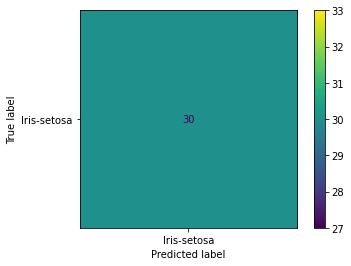

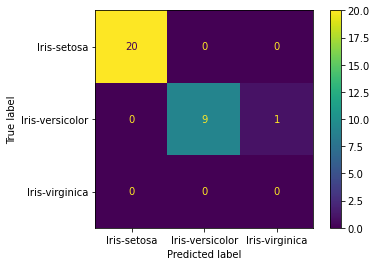

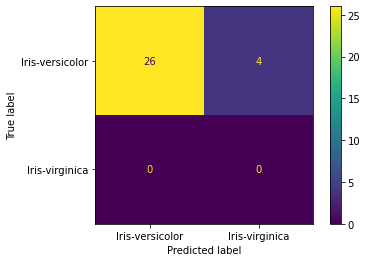

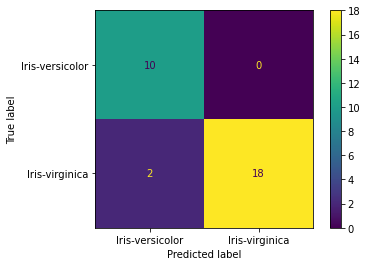

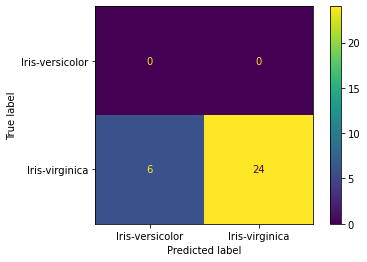

In [45]:
k_fold = KFold(n_splits=5)
for train_idx, test_idx in k_fold.split(X, y):
    train_x, train_y = X[train_idx], y[train_idx]
    test_x, test_y = X[test_idx], y[test_idx]
    
    dt = DecisionTreeClassifier()
    dt.fit(train_x, train_y)
    pred_y = dt.predict(test_x)
    print(f1_score(pred_y, test_y, average='micro'))
    plot_confusion_matrix(dt, test_x, test_y)

0.9666666666666667
0.9666666666666667
0.9


c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_ma

0.9666666666666667
1.0


c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


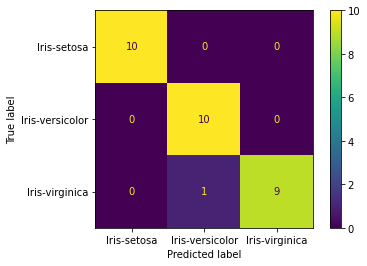

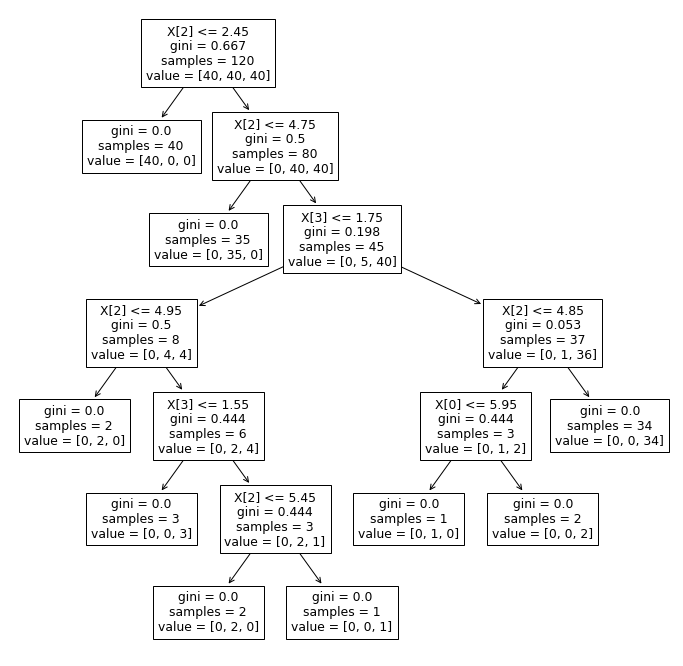

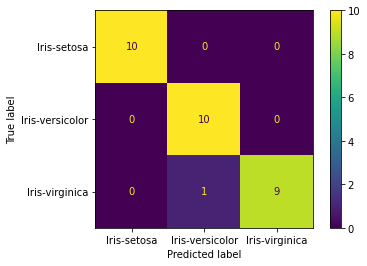

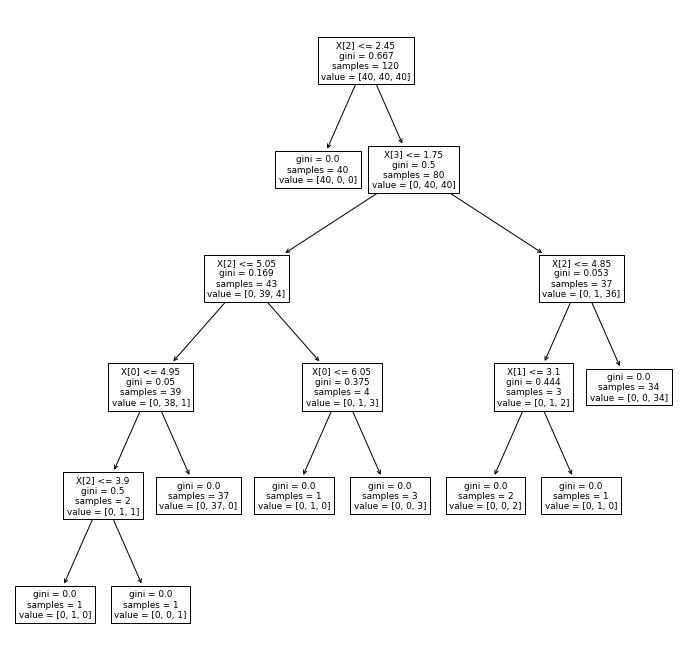

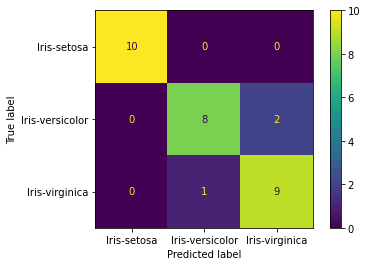

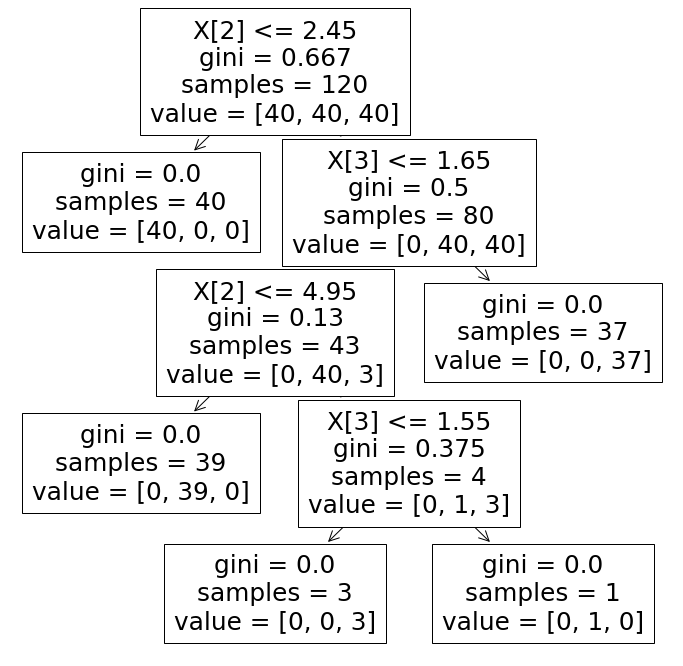

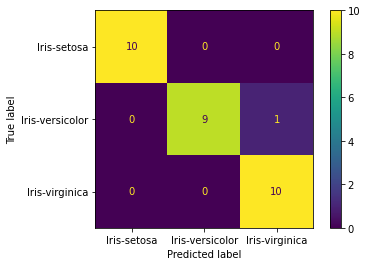

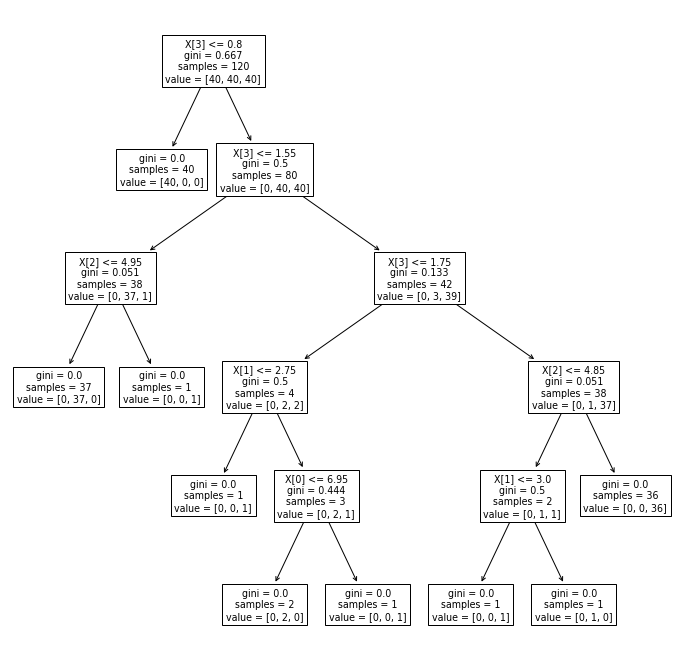

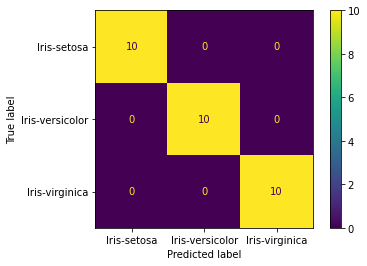

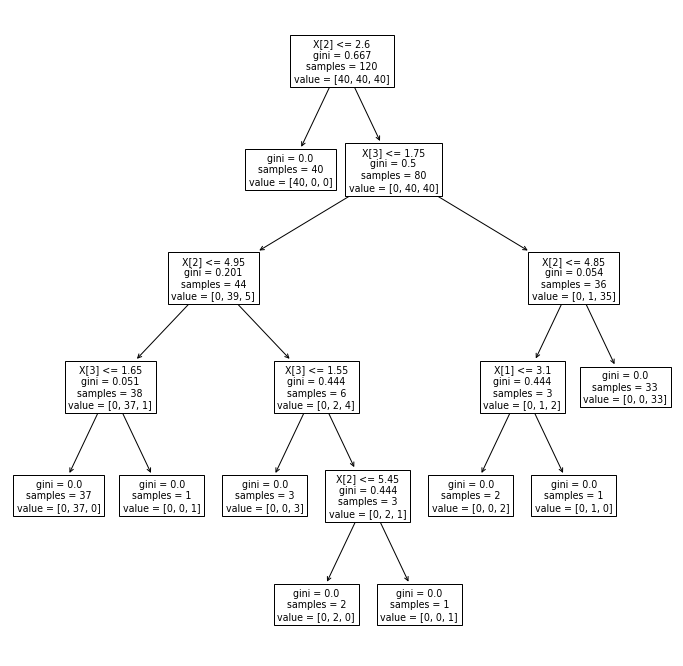

In [46]:
k_fold = StratifiedKFold(n_splits=5)

reasons = []

for train_idx, test_idx in k_fold.split(X, y):
    train_x, train_y = X[train_idx], y[train_idx]
    test_x, test_y = X[test_idx], y[test_idx]
    
    dt = DecisionTreeClassifier(criterion='gini')
    dt.fit(train_x, train_y)
    pred_y = dt.predict(test_x)
    
    reason = export_text(dt, feature_names=list(data.columns[:-1]))
    reasons.append(reason)
    
    print(f1_score(pred_y, test_y, average='micro'))
    plot_confusion_matrix(dt, test_x, test_y)
    
    plt.figure(figsize=(12,12))
    plot_tree(dt)

In [47]:
print(reasons[0])

|--- PetalLengthCm <= 2.45
|   |--- class: Iris-setosa
|--- PetalLengthCm >  2.45
|   |--- PetalLengthCm <= 4.75
|   |   |--- class: Iris-versicolor
|   |--- PetalLengthCm >  4.75
|   |   |--- PetalWidthCm <= 1.75
|   |   |   |--- PetalLengthCm <= 4.95
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- PetalLengthCm >  4.95
|   |   |   |   |--- PetalWidthCm <= 1.55
|   |   |   |   |   |--- class: Iris-virginica
|   |   |   |   |--- PetalWidthCm >  1.55
|   |   |   |   |   |--- PetalLengthCm <= 5.45
|   |   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |   |   |--- PetalLengthCm >  5.45
|   |   |   |   |   |   |--- class: Iris-virginica
|   |   |--- PetalWidthCm >  1.75
|   |   |   |--- PetalLengthCm <= 4.85
|   |   |   |   |--- SepalLengthCm <= 5.95
|   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |   |--- SepalLengthCm >  5.95
|   |   |   |   |   |--- class: Iris-virginica
|   |   |   |--- PetalLengthCm >  4.85
|   |   |   |   |--- class: Iris-virginica


<h1>Mushroom Dataset</h1>

<h2>전처리</h2>

In [48]:
data = pd.read_csv('C:\\Users\\USER\\Desktop\\2022\\수업\\2학기\\기계학습-김동일 교수님\\Decision Tree\\mushrooms.csv', delimiter=',')

In [49]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [50]:
data['class'].unique()

array(['p', 'e'], dtype=object)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [52]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [53]:
del data['veil-type']

In [54]:
unique_nums = data.describe().loc['unique',:]
unique_nums

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
Name: unique, dtype: object

In [55]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [56]:
for column in data.columns[1:]:
    value = float(0)
    unique = unique_nums[column]
    step = 1 / (unique - 1)
    
    column_unique_values = data[column].unique()
    
    # print(step, len(column_unique_values))
    
    for uv in column_unique_values:
        data[column].iloc[np.where(data[column] == uv)] = value
        value += step

In [57]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,e,0.0,0.0,0.111111,0.0,0.125,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.2,0.166667
2,e,0.2,0.0,0.222222,0.0,0.25,0.0,0.0,1.0,0.090909,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.2,0.333333
3,p,0.0,0.333333,0.222222,0.0,0.0,0.0,0.0,0.0,0.090909,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,e,0.0,0.0,0.333333,1.0,0.375,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.125,0.4,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,0.8,0.0,0.0,1.0,0.375,1.0,0.0,1.0,0.909091,...,0.0,0.0,0.75,0.875,0.666667,0.0,0.0,1.0,1.0,1.0
8120,e,0.0,0.0,0.0,1.0,0.375,1.0,0.0,1.0,0.909091,...,0.0,0.0,0.75,0.875,0.333333,0.0,0.0,1.0,0.6,1.0
8121,e,0.6,0.0,0.0,1.0,0.375,1.0,0.0,1.0,0.090909,...,0.0,0.0,0.75,0.875,0.666667,0.0,0.0,1.0,1.0,1.0
8122,p,0.8,0.333333,0.0,1.0,0.75,0.0,0.0,0.0,0.727273,...,0.0,1.0,0.0,0.0,0.0,0.0,0.25,0.5,0.6,1.0


In [58]:
data['class'][data['class'] == 'p'] = 0
data['class'][data['class'] == 'e'] = 1
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.111111,0.0,0.125,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.2,0.166667
2,1,0.2,0.0,0.222222,0.0,0.25,0.0,0.0,1.0,0.090909,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.2,0.333333
3,0,0.0,0.333333,0.222222,0.0,0.0,0.0,0.0,0.0,0.090909,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.0,0.0,0.333333,1.0,0.375,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.125,0.4,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,0.8,0.0,0.0,1.0,0.375,1.0,0.0,1.0,0.909091,...,0.0,0.0,0.75,0.875,0.666667,0.0,0.0,1.0,1.0,1.0
8120,1,0.0,0.0,0.0,1.0,0.375,1.0,0.0,1.0,0.909091,...,0.0,0.0,0.75,0.875,0.333333,0.0,0.0,1.0,0.6,1.0
8121,1,0.6,0.0,0.0,1.0,0.375,1.0,0.0,1.0,0.090909,...,0.0,0.0,0.75,0.875,0.666667,0.0,0.0,1.0,1.0,1.0
8122,0,0.8,0.333333,0.0,1.0,0.75,0.0,0.0,0.0,0.727273,...,0.0,1.0,0.0,0.0,0.0,0.0,0.25,0.5,0.6,1.0


In [59]:
data['class'] = data['class'].astype('int')

In [60]:
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

k_fold = KFold(n_splits=5)

In [61]:
X.shape

(8124, 21)

In [62]:
y.shape

(8124,)

1.0
1.0


c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


1.0
1.0


c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


0.9839679358717435


c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


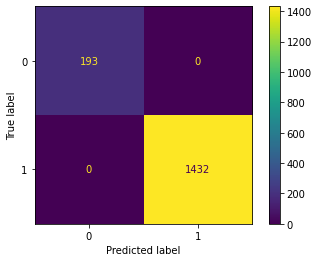

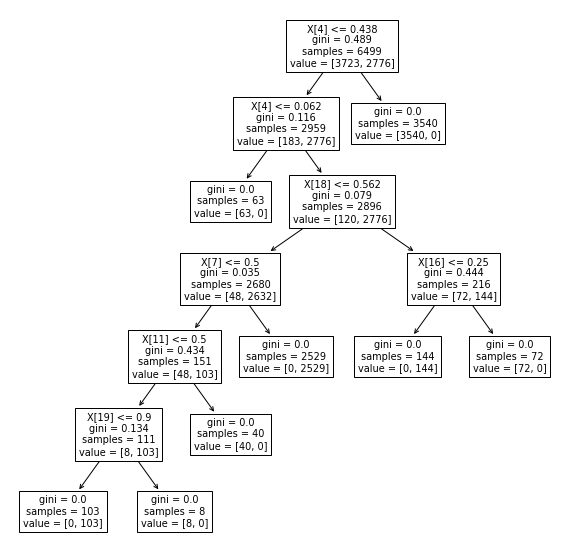

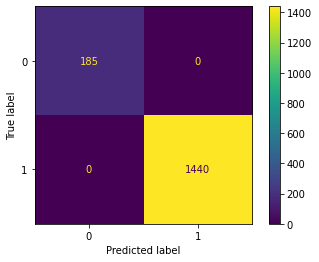

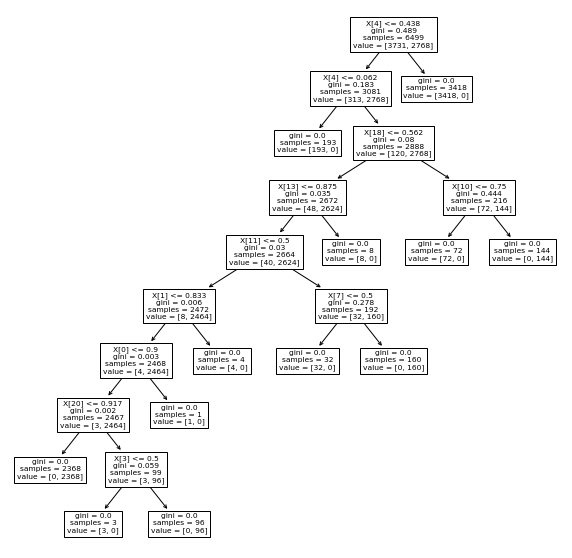

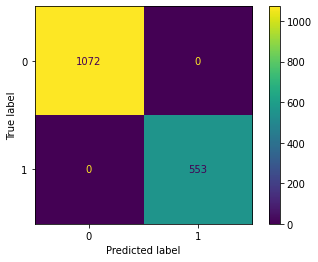

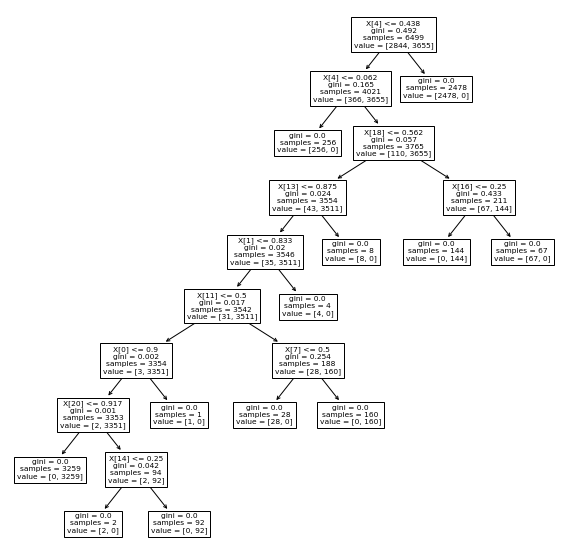

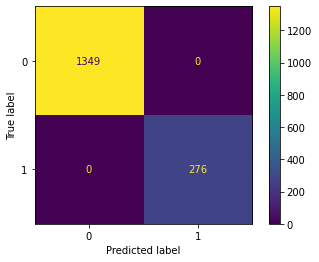

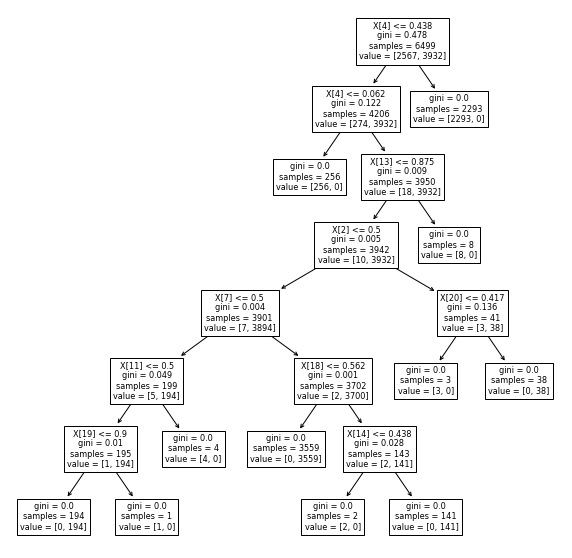

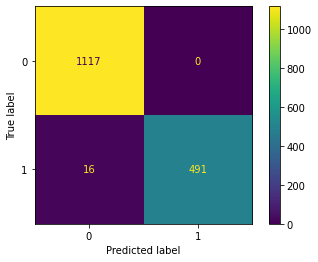

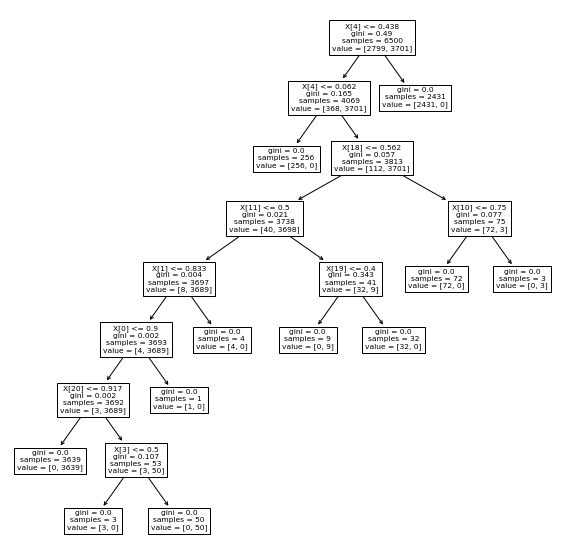

In [66]:
reasons = []

for train_idx, test_idx in k_fold.split(X, y):
    train_x, train_y = X[train_idx], y[train_idx]
    test_x, test_y = X[test_idx], y[test_idx]
    
    dt = DecisionTreeClassifier()
    dt.fit(train_x, train_y)
    pred_y = dt.predict(test_x)
    
    print(f1_score(pred_y, test_y))
    plot_confusion_matrix(dt, test_x, test_y)
    
    reason = export_text(dt, feature_names=list(data.columns[:-1]))
    reasons.append(reason)
    
    plt.figure(figsize=(10,10))
    plot_tree(dt)

<h1>Assignment</h1>

mushroom dataset의 DecisionTree 결과를 분석해보기

In [64]:
print(reasons[0])

|--- bruises <= 0.44
|   |--- bruises <= 0.06
|   |   |--- class: 0
|   |--- bruises >  0.06
|   |   |--- ring-type <= 0.56
|   |   |   |--- gill-spacing <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- gill-spacing >  0.50
|   |   |   |   |--- class: 1
|   |   |--- ring-type >  0.56
|   |   |   |--- veil-color <= 0.25
|   |   |   |   |--- class: 1
|   |   |   |--- veil-color >  0.25
|   |   |   |   |--- class: 0
|--- bruises >  0.44
|   |--- class: 0

